In [1]:
import rawgpy
import time
import json
import urllib.request
from nt import listdir
import os
import re
from os import path
import pandas as pd
import numpy as np
import nltk
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
from sklearn.metrics import f1_score


pd.set_option('display.max_colwidth', 300)
meta = pd.read_csv("C:/Users/Matilde/Desktop/GitHub/datamin/gameDescription.csv", sep = ',' , header = None)

meta.columns = ["id","name","description","genres"]
meta.head()

,id,name,description,genres
0,28310,0 day attack on earth,seven days determine fate humanity begin hightech tokyo rubble vibrant new york ground halt city lights paris enveloped darkness despair join mankinds struggle massive invaders converge worlds major cities battles set actual areas modern metropolitan cities take flight one futuristic aircraft he...,['Shooter']
1,10235,0 day,freedom movement flight touch pad teleportation move city hunting enemies growing assortment weapons homemade spears assault rifles sneak armed targets catch guard maneuver full speed around bullets bat head distance take back control city terrorist infected help shape game give feedback work m...,"['Action', 'Adventure', 'Strategy', 'Indie']"
2,386925,0 hour meltdown,built hour game jam power plant meltdown turn everything try stop meltdown timer,['Puzzle']
3,381643,0 lives left,play game lives left controls cloths tutorial,['Platformer']
4,379914,0 robert blaster391 arnold,puzzle platformer start controls visionmade hours ludum dare game jam theme start nothing,['Puzzle']


In [2]:
games = pd.DataFrame(meta)
games.head()

,id,name,description,genres
0,28310,0 day attack on earth,seven days determine fate humanity begin hightech tokyo rubble vibrant new york ground halt city lights paris enveloped darkness despair join mankinds struggle massive invaders converge worlds major cities battles set actual areas modern metropolitan cities take flight one futuristic aircraft he...,['Shooter']
1,10235,0 day,freedom movement flight touch pad teleportation move city hunting enemies growing assortment weapons homemade spears assault rifles sneak armed targets catch guard maneuver full speed around bullets bat head distance take back control city terrorist infected help shape game give feedback work m...,"['Action', 'Adventure', 'Strategy', 'Indie']"
2,386925,0 hour meltdown,built hour game jam power plant meltdown turn everything try stop meltdown timer,['Puzzle']
3,381643,0 lives left,play game lives left controls cloths tutorial,['Platformer']
4,379914,0 robert blaster391 arnold,puzzle platformer start controls visionmade hours ludum dare game jam theme start nothing,['Puzzle']


In [22]:
genres = [] 
genres1 = [] 
s1= ['']
# extract genres
for i in games['genres']: 
    a = list(i.replace("]",'').replace('[','').replace("'",'').replace(' ','').split(","))
    if a == s1:
        genres.append(' ') 
    else:
        genres.append(a)
        genres1.append(a)

# add to 'movies' dataframe  
games['genre_new'] = genres
games.shape

(65709, 5)

In [23]:
games_new =  games[~(games['genre_new'] == ' ')]
games_new.head(1000)

,id,name,description,genres,genre_new
0,28310,0 day attack on earth,seven days determine fate humanity begin hightech tokyo rubble vibrant new york ground halt city lights paris enveloped darkness despair join mankinds struggle massive invaders converge worlds major cities battles set actual areas modern metropolitan cities take flight one futuristic aircraft he...,['Shooter'],[Shooter]
1,10235,0 day,freedom movement flight touch pad teleportation move city hunting enemies growing assortment weapons homemade spears assault rifles sneak armed targets catch guard maneuver full speed around bullets bat head distance take back control city terrorist infected help shape game give feedback work m...,"['Action', 'Adventure', 'Strategy', 'Indie']","[Action, Adventure, Strategy, Indie]"
2,386925,0 hour meltdown,built hour game jam power plant meltdown turn everything try stop meltdown timer,['Puzzle'],[Puzzle]
3,381643,0 lives left,play game lives left controls cloths tutorial,['Platformer'],[Platformer]
4,379914,0 robert blaster391 arnold,puzzle platformer start controls visionmade hours ludum dare game jam theme start nothing,['Puzzle'],[Puzzle]
...,...,...,...,...,...
995,59359,a plague tale innocence,plague tale innocence playstation xbox one tells grim story two siblings fighting together survival darkest hours history new video game asobo studio sends emotional journey century france gameplay combining adventure action stealth supported compelling story follow young amicia little brother...,"['Action', 'Adventure']","[Action, Adventure]"
996,380207,a platfomer,made ludum dare description simple platformer make goal one problem platforms place platform place hurt score farther away place spawn point higher base score get platform remove score try make goal highest possible score levels blocker spikes cant always take direct route controls move adjump s...,['Platformer'],[Platformer]
997,46336,a plot story,girl lily gets assignment strange man peter needs break duchesss mansion steal papers entering mansion lily finds duchess engaged black magic plotting king lily disrupt duchesss cunning plans save kingdom chaos exciting story hidden object genre puzzle occurring magic world game level hours fasc...,['Casual'],[Casual]
998,370853,apollo in space,thefxp game jam expanded project made quite fun play chicken crash landed pluto space takeoff gone wrong skillfully glide past comets reach last planet find way back planet earth,['Adventure'],[Adventure]


In [24]:
games_new.shape, games.shape

((65709, 5), (65709, 5))

In [25]:
all_genres = sum(genres1,[])


print(len(set(all_genres)))

19


In [26]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

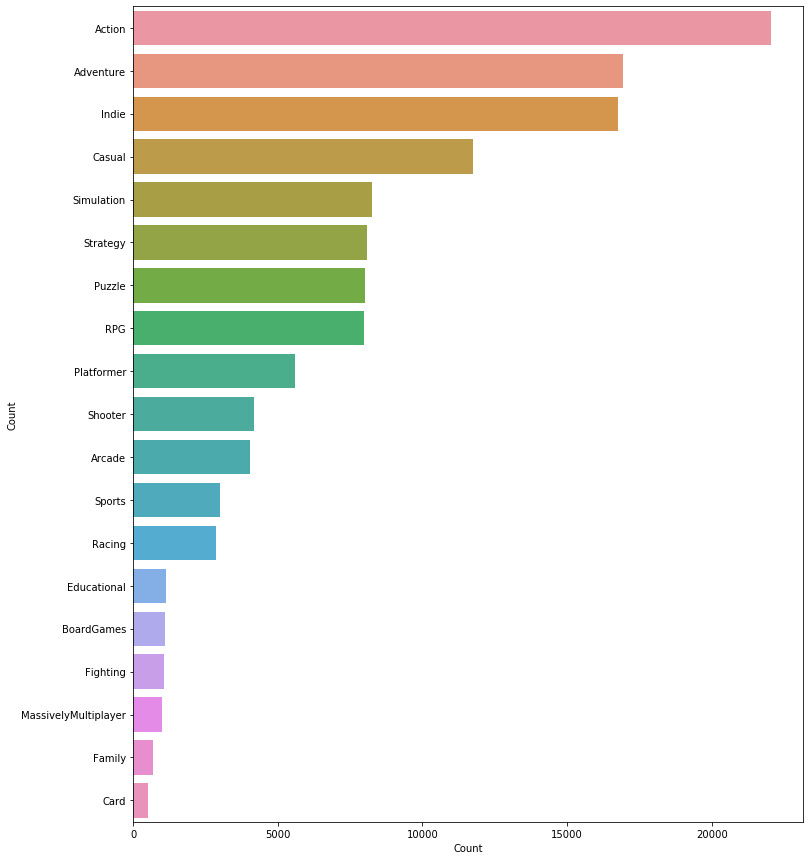

In [27]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [28]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(games_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(games_new['genre_new'])

In [29]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [30]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(games_new['description'], y, test_size=0.2, random_state=9)

In [31]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [32]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [33]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

C:\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ex

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [0]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [0]:
y_pred[3]

In [0]:
multilabel_binarizer.inverse_transform(y_pred)[3]

In [0]:
f1_score(yval, y_pred, average="micro")

In [0]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [0]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [0]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")